# ***import libraries***

In [222]:
#Import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ***load csv file***

In [223]:
#Load Data set
data=pd.read_csv("/content/Placement_Data_Full_Class.csv")
data.head(3)

,\,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


# ***converting to data frame***

In [224]:
#Converting to Data Frame
df=pd.DataFrame(data)
df.head(3)

,\,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


# ***Information about Data Set***

In [225]:
#Information about Data Set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   \               215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# ***Shape of the Data Set***

In [226]:
#Shape of the Data Set
df.shape

(215, 15)

# ***Columns of Data Set***

In [227]:
#Columns of Data Set
df.columns

Index(['\', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

# ***Describe Data Set***

In [228]:
#Describe Data Set
df.describe()

,\,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# ***Handling Missing Values***

In [229]:
#Finding missing values
df.isnull().sum()

,0
\,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


# ***Handling Duplicates***

In [230]:
#Finding duplicates
df.duplicated().sum()

np.int64(0)

# ***Encoding***

In [231]:
#Assining independent variables to x and target variable to y
x=df.drop('salary',axis=1)
y=df['salary']
print(x.columns)
print(y)

Index(['\', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')
0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64


In [232]:
# Encoding the independent variable, there is no need of encoding  y. beacuse y also in a numerical column.
oh = OneHotEncoder(sparse_output=False)
gender_reshape=x['gender'].values.reshape(-1, 1)
e_gender=oh.fit_transform(gender_reshape)
encoded_gender= pd.DataFrame(e_gender, columns=oh.categories_[0], dtype=int)
encoded_gender



,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
210,0,1
211,0,1
212,0,1
213,1,0


In [233]:
oh = OneHotEncoder(sparse_output=False)
ssc_b_reshape=x['ssc_b'].values.reshape(-1, 1)
e_ssc_b=oh.fit_transform(city_reshape)
encoded_ssc_b= pd.DataFrame(e_ssc_b, columns=oh.categories_[0], dtype=int)
encoded_ssc_b

,Central,Others
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
210,0,1
211,0,1
212,0,1
213,0,1


In [234]:
x.columns

Index(['\', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [235]:
#encoding all categorical columns or instances except int and float columns
encoded=oh.fit_transform(x[['gender','ssc_b','hsc_s','degree_t','workex','specialisation','status',]])
encoded_df=pd.DataFrame(encoded, columns=oh.get_feature_names_out())
encoded_df

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
211,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
212,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [236]:
encoded_df

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
211,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
212,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [237]:
#concat encoded columns with int and float columnsdy Hours','Financial Stress']]
remaining_x=df[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
new_x=pd.concat([remaining_x,encoded_df],axis=1)
new_x

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_s_Arts,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,79.33,78.33,77.48,86.5,66.28,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,65.00,68.00,64.00,75.0,57.80,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,56.00,52.00,52.00,66.0,59.43,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,85.80,73.60,73.30,96.8,55.50,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
211,58.00,60.00,72.00,74.0,53.62,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
212,67.00,67.00,73.00,59.0,69.72,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
213,74.00,66.00,58.00,70.0,60.23,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [238]:
#Independent varible is 'new_x' and target variable is 'y'

# ***Handling outlier's***
Findign outlier's for only numerical columns(indepentend variable), that columns are already a numerical before applying encoding.

In [239]:
def handling_outlires(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].apply(lambda x:upper_bound if x>upper_bound else x)
  return df

<Axes: >

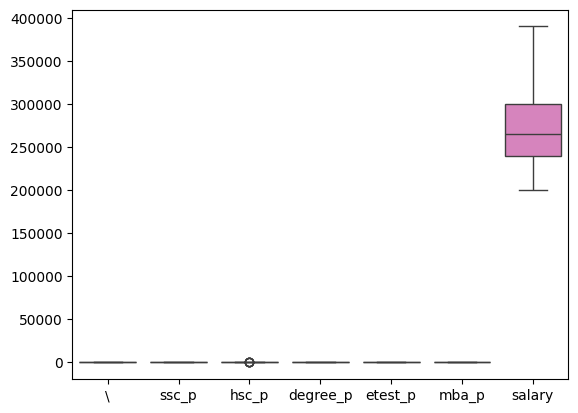

In [240]:
df1=handling_outlires(df)
df1.head()
sns.boxplot(df1)

Text(0.5, 1.0, 'Box plot for ssc_p')

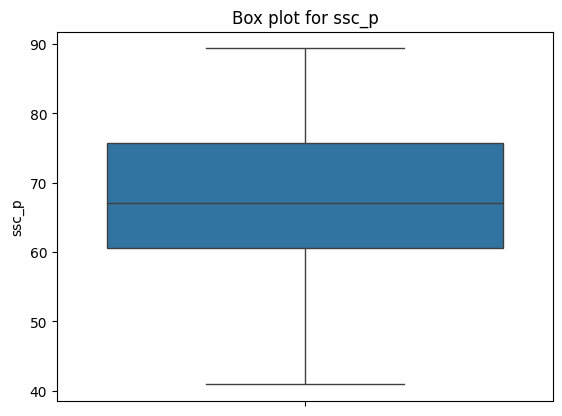

In [241]:
#Finding outlier's using Box plot for Age
sns.boxplot(new_x['ssc_p'])
plt.title("Box plot for ssc_p")

<ipython-input-242-e278a49192bc>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


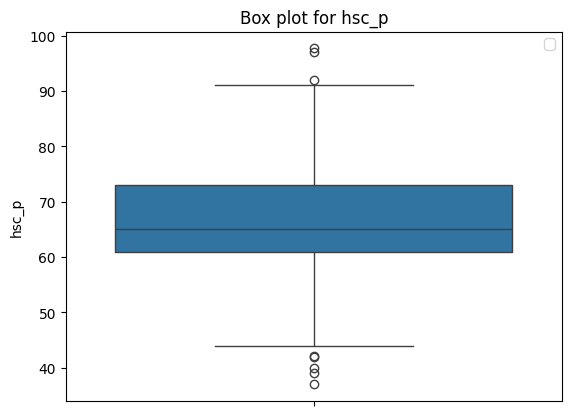

In [242]:
#Finding outlier's using Box plot for hsc_p
sns.boxplot(new_x['hsc_p'])
plt.title("Box plot for hsc_p")
plt.legend(loc='upper right')

In [243]:
#Finding lower bound and upper bound
q1=new_x['hsc_p'].quantile(0.25)
q3=new_x['hsc_p'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print("First quartile:",q1)
print("Third quartile:",q3)
print("Inter Quartile Range:",iqr)
print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)

First quartile: 60.9
Third quartile: 73.0
Inter Quartile Range: 12.100000000000001
Lower bound: 42.75
Upper bound: 91.15


In [244]:
filtered_x=new_x[(new_x['hsc_p']>=lower_bound) & (new_x['hsc_p']<=upper_bound)]
print("Filtered Data:")
filtered_x

Filtered Data:


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_s_Arts,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,79.33,78.33,77.48,86.5,66.28,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,65.00,68.00,64.00,75.0,57.80,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,56.00,52.00,52.00,66.0,59.43,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,85.80,73.60,73.30,96.8,55.50,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
211,58.00,60.00,72.00,74.0,53.62,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
212,67.00,67.00,73.00,59.0,69.72,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
213,74.00,66.00,58.00,70.0,60.23,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Now there is no outliers on hsc_p column



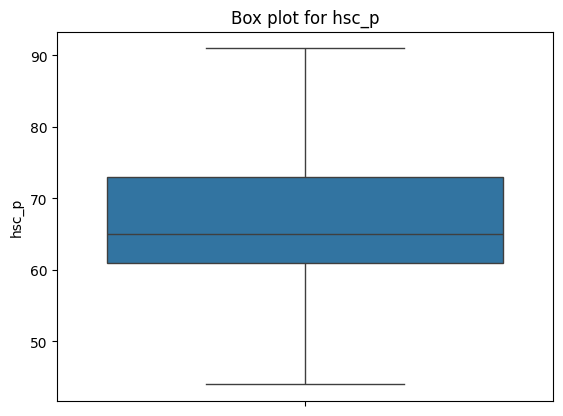

In [245]:
sns.boxplot(filtered_x['hsc_p'])
plt.title("Box plot for hsc_p")
print("Now there is no outliers on hsc_p column")
print()

<ipython-input-246-2782e7275eb2>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


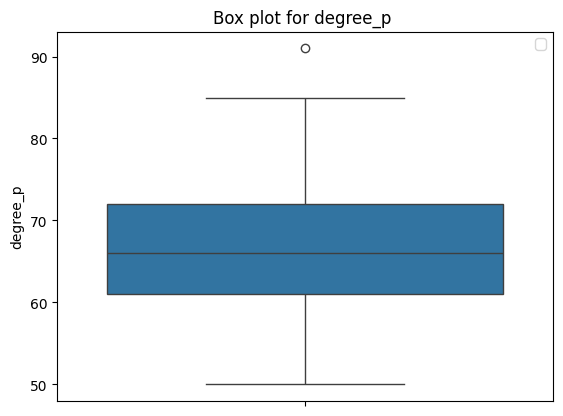

In [246]:
sns.boxplot(new_x['degree_p'])
plt.title("Box plot for degree_p ")
plt.legend(loc='upper right')

In [247]:
#Finding lower bound and upper bound
q1=new_x['degree_p'].quantile(0.25)
q3=new_x['degree_p'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print("First quartile:",q1)
print("Third quartile:",q3)
print("Inter Quartile Range:",iqr)
print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)

First quartile: 61.0
Third quartile: 72.0
Inter Quartile Range: 11.0
Lower bound: 44.5
Upper bound: 88.5


In [248]:
filtered_x=new_x[(new_x['degree_p']>=lower_bound) & (new_x['degree_p']<=upper_bound)]
print("Filtered Data:")
filtered_x

Filtered Data:


,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_s_Arts,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,79.33,78.33,77.48,86.5,66.28,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,65.00,68.00,64.00,75.0,57.80,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,56.00,52.00,52.00,66.0,59.43,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,85.80,73.60,73.30,96.8,55.50,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
211,58.00,60.00,72.00,74.0,53.62,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
212,67.00,67.00,73.00,59.0,69.72,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
213,74.00,66.00,58.00,70.0,60.23,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Now there is no outliers on degree_p column



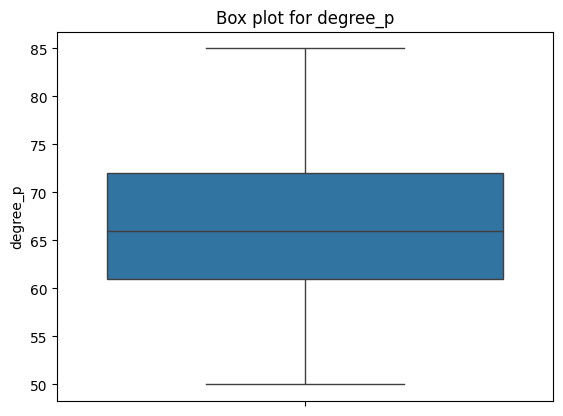

In [249]:
sns.boxplot(filtered_x['degree_p'])
plt.title("Box plot for degree_p")
print("Now there is no outliers on degree_p column")
print()

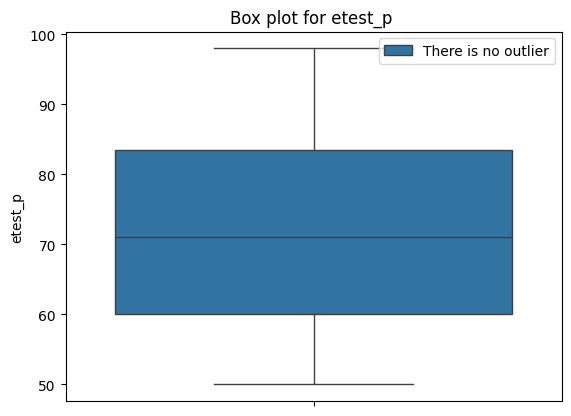

In [250]:
sns.boxplot(new_x['etest_p'],label='There is no outlier')
plt.title("Box plot for etest_p ")
plt.legend(loc='upper right')


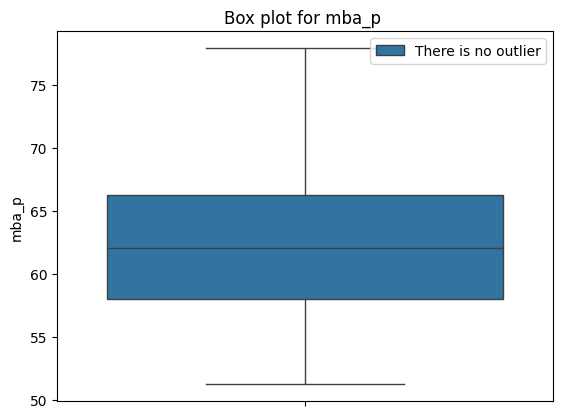

In [251]:
sns.boxplot(new_x['mba_p'],label='There is no outlier')
plt.title("Box plot for mba_p ")
plt.legend(loc='upper right')

# ***Creating different Plots***

# ***Box plot for nemerical coulmns on independent(x) variables***

<Axes: >

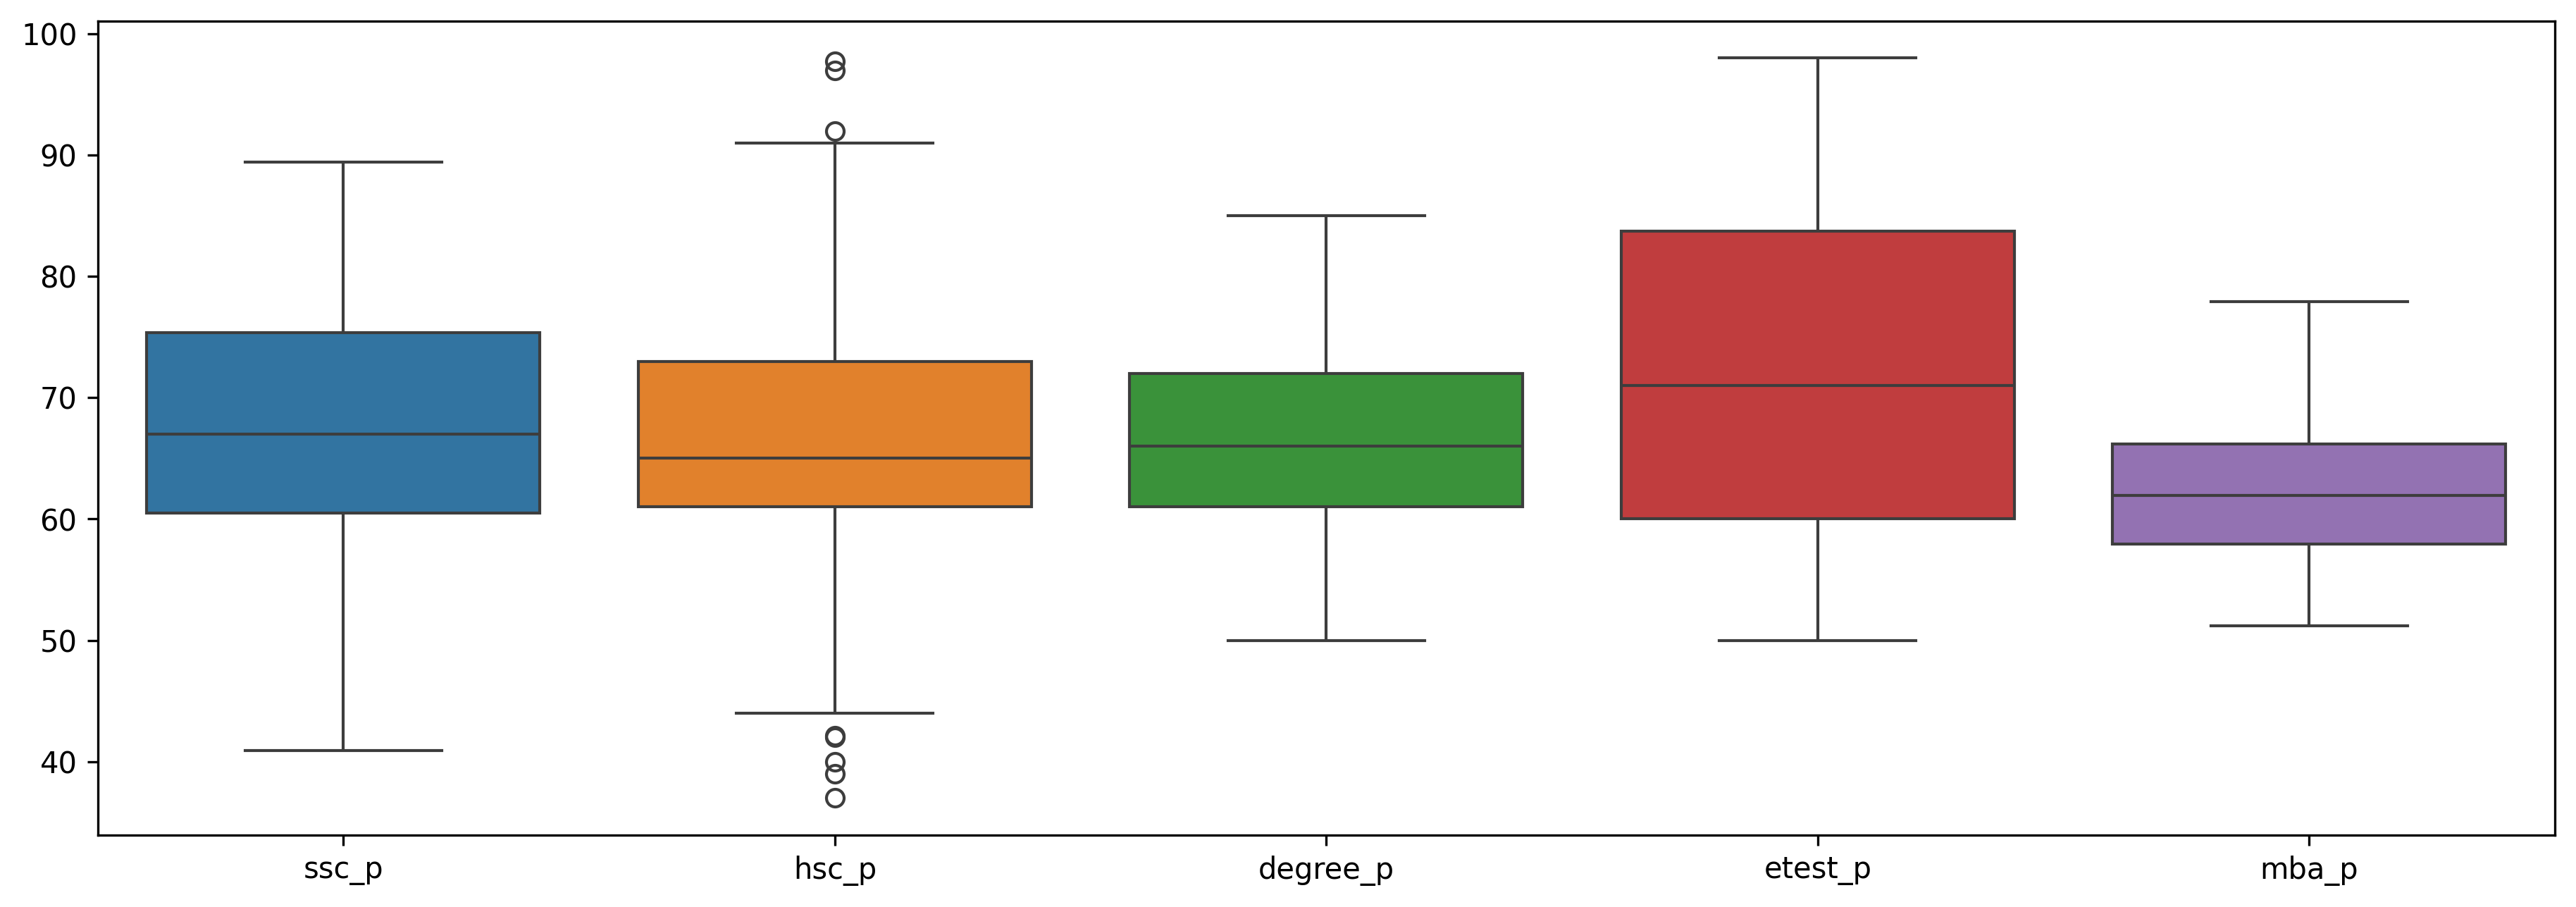

In [252]:
#Box plot for nemerical coulmns on independent(x) variables
lst=filtered_x[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
plt.figure(figsize=(15,5),dpi=300)
sns.boxplot(lst)

# ***Heat map for x(numeric) variables***

<ipython-input-253-63b6ae962e7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list[col] = pd.to_numeric(new_list[col].replace('?', np.nan))


<Axes: >

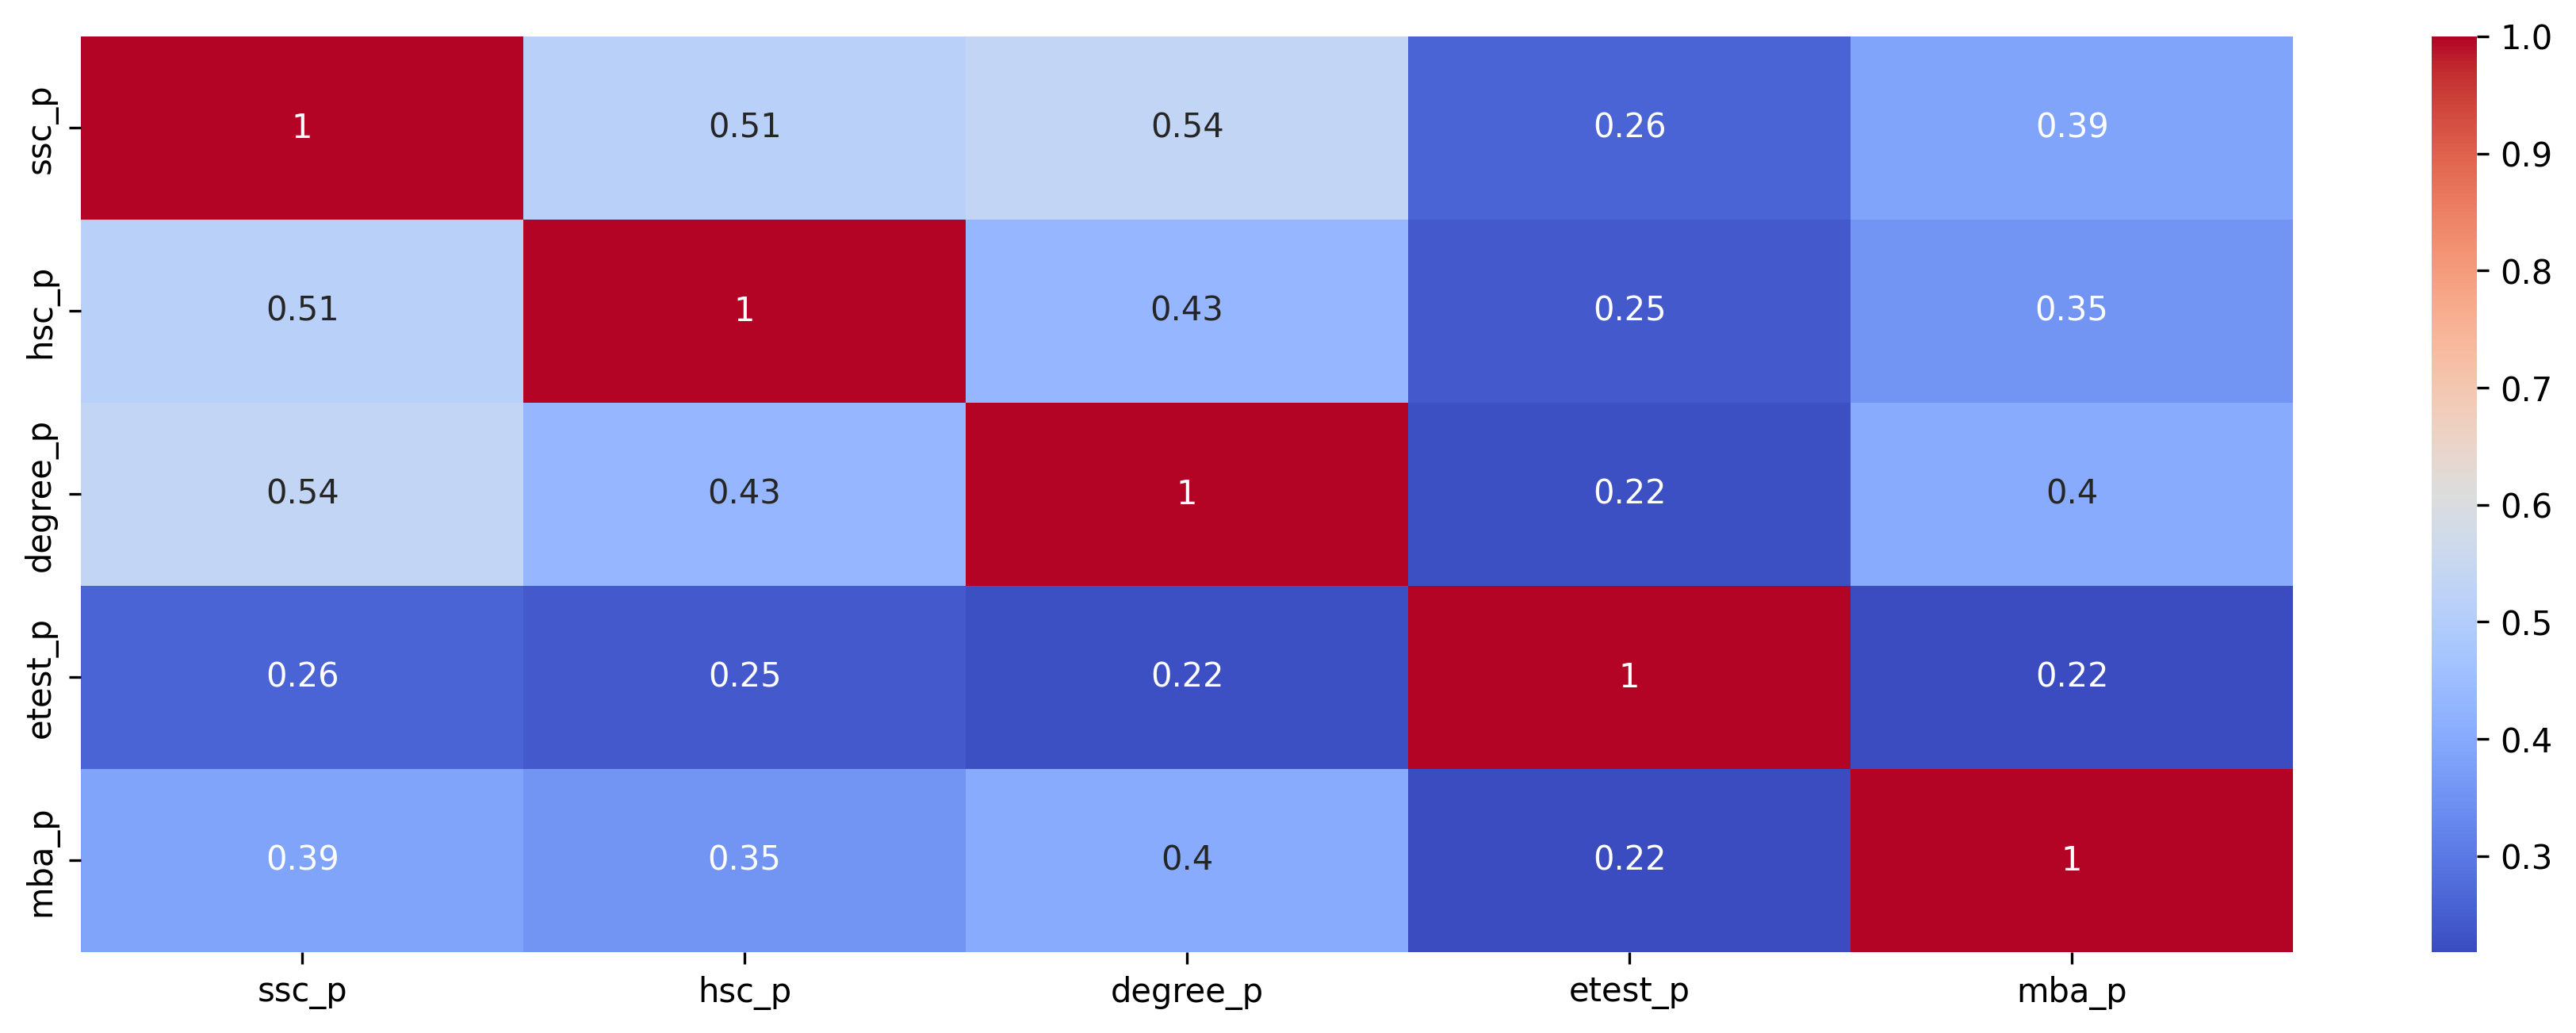

In [253]:
#Heat map for x(numeric) variables
new_list=new_x[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
plt.figure(figsize=(15,5),dpi=300)
for col in new_list.columns:
    new_list[col] = pd.to_numeric(new_list[col].replace('?', np.nan))
c=new_list.corr()
sns.heatmap(c,annot=True,cmap='coolwarm')

# ***histplot***

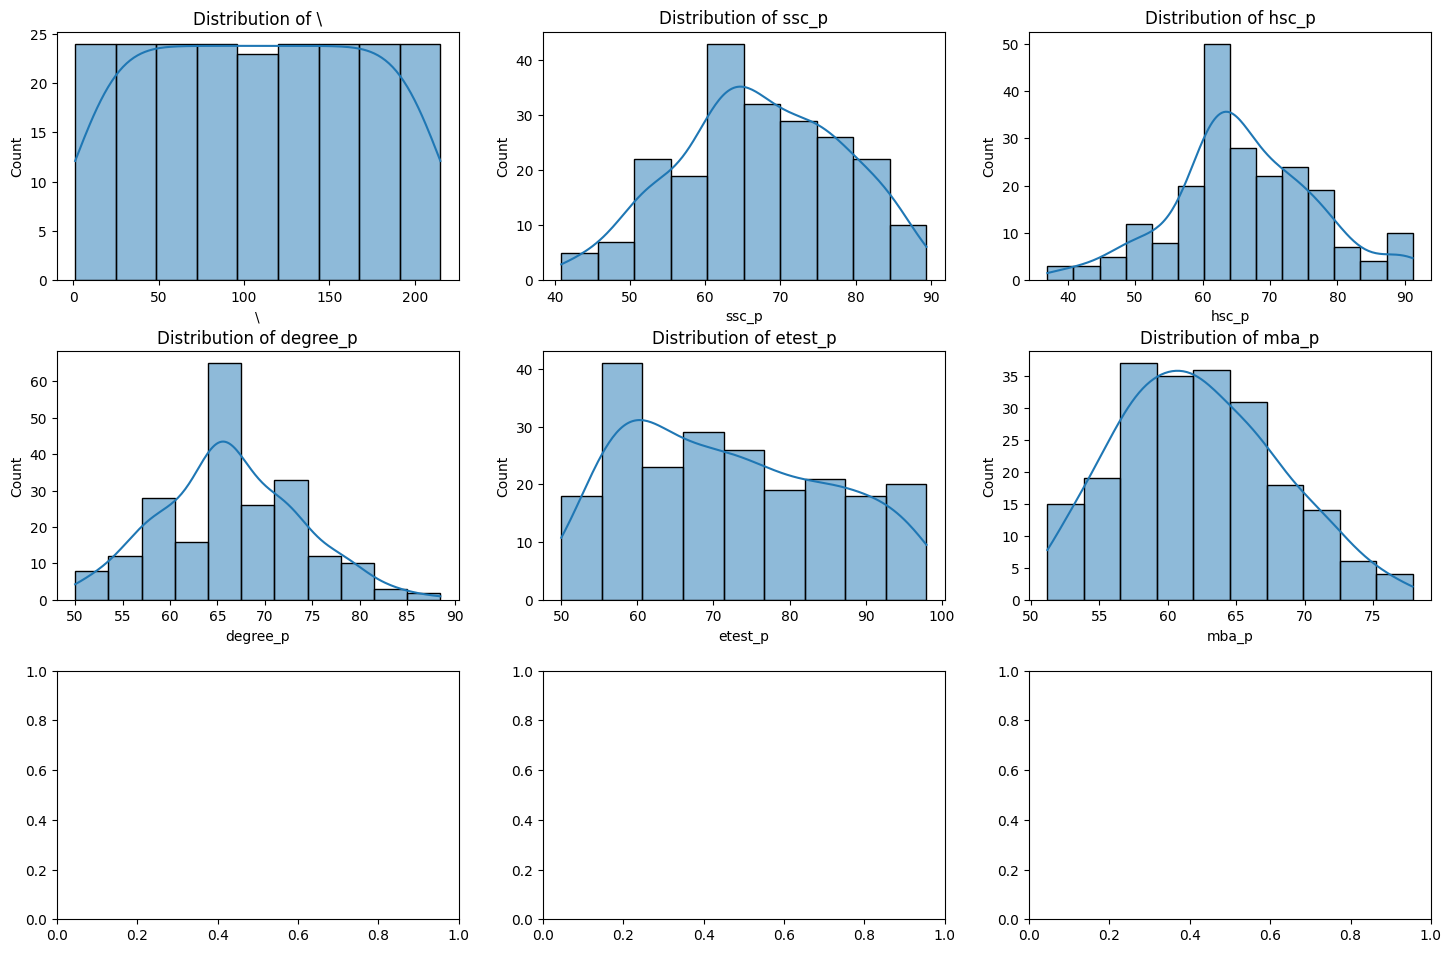

In [254]:
fix,ax= plt.subplots(3, 3,figsize=(15,10))
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'salary']

for i, col in enumerate(n):
    row = i // 3
    col_num = i % 3
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.histplot(df[col],kde=True, ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

# ***scatterplot***

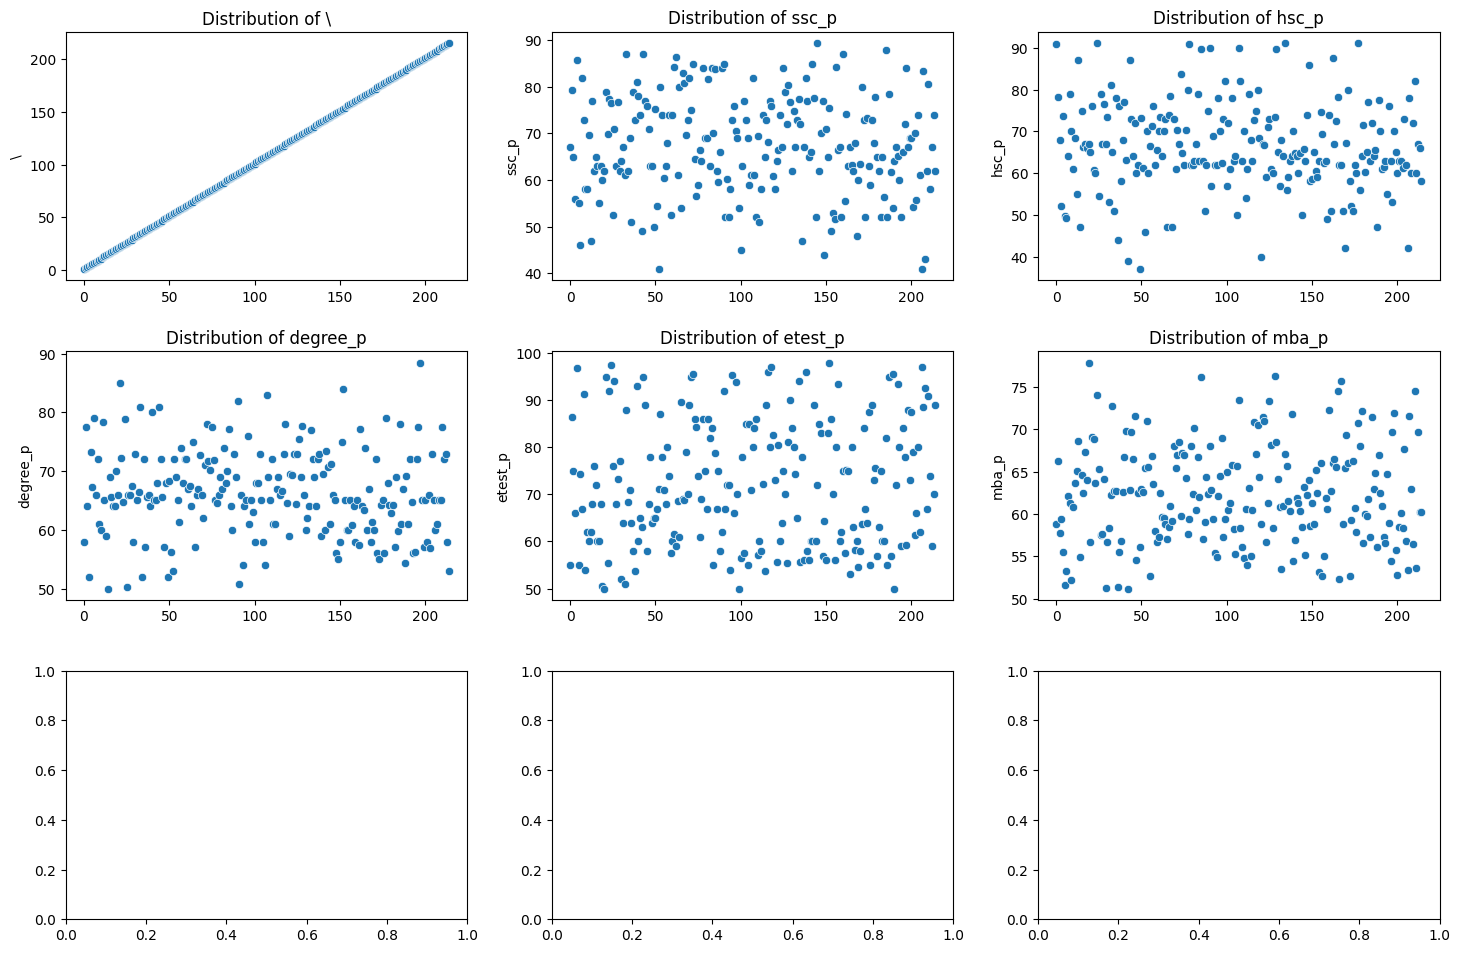

In [255]:
fix,ax= plt.subplots(3, 3,figsize=(15,10))
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'salary']

for i, col in enumerate(n):
    row = i // 3
    col_num = i % 3
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.scatterplot(df[col], ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

# ***kde plot***

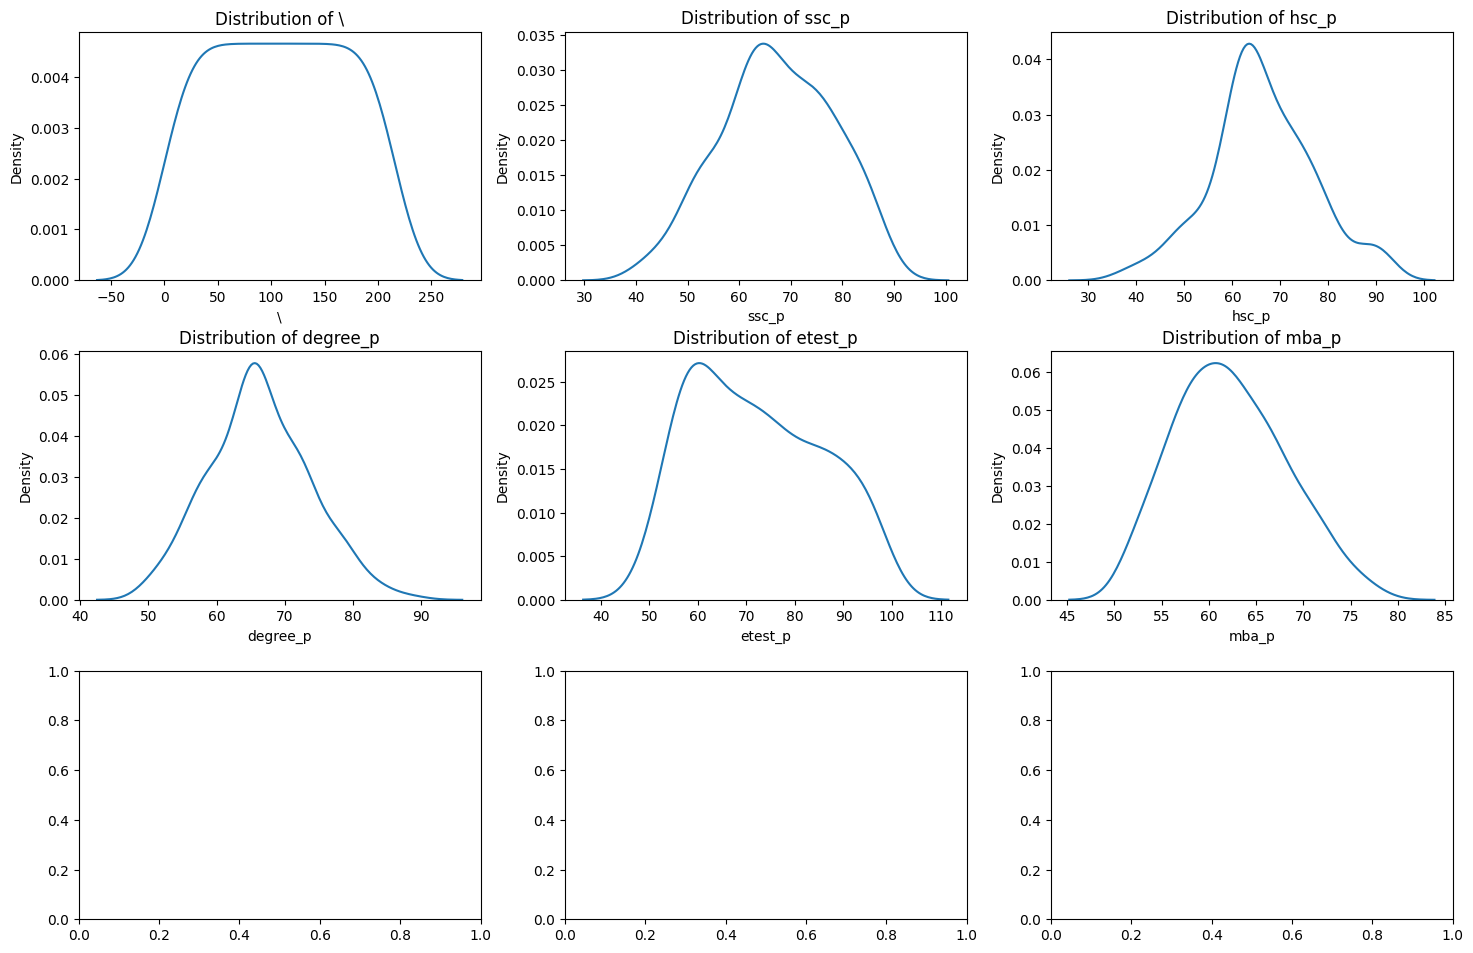

In [256]:
fix,ax= plt.subplots(3, 3,figsize=(15,10))
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'salary']

for i, col in enumerate(n):
    row = i // 3
    col_num = i % 3
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.kdeplot(df[col], ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

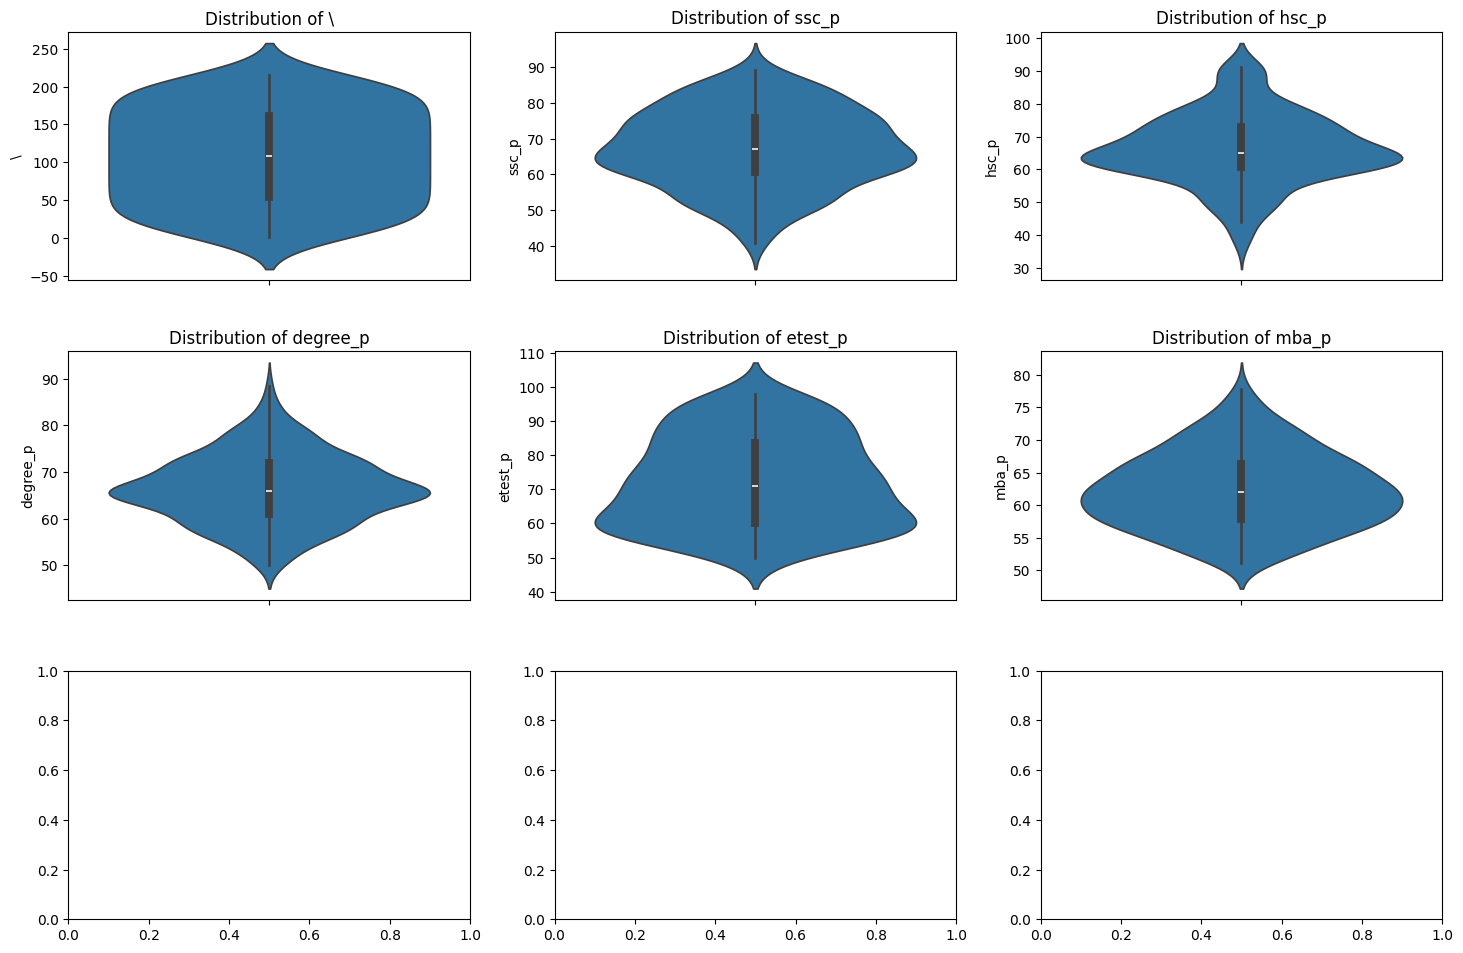

In [257]:
fix,ax= plt.subplots(3, 3,figsize=(15,10))
fix.tight_layout(pad=3.0)
numeric_cols = df.select_dtypes(include='number').columns
n = numeric_cols[numeric_cols != 'salary']

for i, col in enumerate(n):
    row = i // 3
    col_num = i % 3
    # Access the column data from the DataFrame 'df' using the column name 'col'
    sns.violinplot(df[col], ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

# ***skew***

In [258]:
df1.select_dtypes(include=np.number).skew()

,0
\,0.000000
ssc_p,-0.132649
hsc_p,0.071235
degree_p,0.204164
etest_p,0.282308
mba_p,0.313576
salary,0.806700


# ***feature selection***

In [259]:
from sklearn.preprocessing import StandardScaler

In [260]:
ss=StandardScaler()

In [261]:
x=df.drop('salary',axis=1)
y=df['salary']


# ***split x and y***

In [262]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [263]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 14)
(43, 14)
(172,)
(43,)


# ***scaling***

In [298]:
numerical_features = x_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

### ***model selection***

In [299]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [300]:
print("\n Training models,")
models={'Linear Regression':LinearRegression(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest':RandomForestRegressor(random_state=42),
        'DT':DecisionTreeRegressor(),
        'Gradient Boosting':GradientBoostingRegressor(random_state=42),'SVR':SVR()}


 Training models,


In [301]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [302]:

numeric_features = x_test.select_dtypes(include=['number']).columns
categorical_features = x_test.select_dtypes(include=['object']).columns

for feature in numeric_features:
    x_test[feature] = x_test[feature].fillna(x_train[feature].mean())

for feature in categorical_features:
    x_test[feature] = x_test[feature].fillna(x_train[feature].mode()[0])


for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f"{name}: R² Score = {r2:.4f}")

Linear Regression: R² Score = -0.0255
Decision Tree: R² Score = -0.0255
Random Forest: R² Score = -0.0255
DT: R² Score = -0.0255
Gradient Boosting: R² Score = -0.0255
SVR: R² Score = -0.0255


# ***model evaluation***

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer

In [304]:
resuilt={}
for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)



In [306]:
resuilt={}
for name,model in models.items():
  model.fit(x_train_scaled,y_train)

  y_pred=model.predict(x_test_scaled)


  mask = np.isnan(y_test) | np.isnan(y_pred)
  y_test_clean = y_test[~mask]
  y_pred_clean = y_pred[~mask]


results = {
    "MAE": mean_absolute_error(y_test_clean, y_pred_clean),
    "MSE": mean_squared_error(y_test_clean, y_pred_clean),
    "RMSE": np.sqrt(mean_squared_error(y_test_clean, y_pred_clean)),
    "R2": r2_score(y_test_clean, y_pred_clean)
}
print(results)

{'MAE': 43144.69816213901, 'MSE': 2917155046.021413, 'RMSE': np.float64(54010.69381170189), 'R2': -0.009130963501550848}


In [307]:
print("\nModel Performance:")
for model_name, metric_value in results.items():
  print(f"\n{model_name}: {metric_value:.4f}")


Model Performance:

MAE: 43144.6982

MSE: 2917155046.0214

RMSE: 54010.6938

R2: -0.0091
